<a href="https://colab.research.google.com/github/Demon-God-King/GoogleColab/blob/main/class_grades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at the impact of attendance and homework in class grades

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

It's interesting to look at how absences and missing homework assignments relate to course grades.

I created a data set by taking grade information from a section of CST 383 from a couple of years ago, anonymizing the data, and then randomizing the data a little.  So this data is not real, but the results you'll get will be similar to what you'd get with the real data.

Every row in the dataset represents a student.  The columns give average scores for things like homework, quizzes, and projects, the total score for the course, the number of absences, and the number of homework assignments not turned in.  (Actually, I treated homework assignments with very low scores as missing homework assignments.)

### Instructions (read carefully)

- After each problem, enter your code in the cell below.  Never modify dataframe df.

- When plotting, give your plot a title plus x and y axis labels.  I will mention when certain axis labels aren't needed.

- Do not modify any other cells, except for the cell below that specifies the default plot size.  Don't add any import statements.

- In a cell containing plotting statements, but sure to add a semi-colon after the last plotting statement in the cell.

- Points will be deducted for code that is untidy or achieves the result in a strange way.

- Be sure to **restart and run all** before submitting.  If this has not been done, your homework won't be graded.

#### Set plotting options

In [ ]:
# use the seaborn default stylistic parameters
# see the very useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
# select the plotting style
sns.set_style('whitegrid')
# sets overall plotting parameters
sns.set_context('notebook')   # 'paper', 'notebook', or 'talk

You may need to modify the code in this cell, depending on your device.

In [ ]:
# set default plot size
rcParams['figure.figsize'] = 6,4

### Read the data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/fake-grades.csv')

### Basic exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Number_days_missed  38 non-null     int64
 1   Number_hw_missed    38 non-null     int64
 2   Homework            38 non-null     int64
 3   Quizzes             38 non-null     int64
 4   Projects            38 non-null     int64
 5   Final               38 non-null     int64
 6   Total               38 non-null     int64
dtypes: int64(7)
memory usage: 2.2 KB


In [ ]:
df.describe()

,Number_days_missed,Number_hw_missed,Homework,Quizzes,Projects,Final,Total
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1.710526,2.236842,82.105263,74.000000,81.947368,83.342105,82.578947
std,1.829309,2.341566,16.859979,12.642699,11.608355,11.060708,9.350911
min,0.000000,0.000000,42.000000,48.000000,35.000000,56.000000,58.000000
25%,0.000000,0.250000,69.250000,70.000000,77.250000,77.250000,76.000000
50%,1.000000,1.500000,85.000000,73.500000,83.500000,83.500000,85.000000
75%,3.000000,3.750000,96.000000,80.750000,89.000000,92.000000,89.000000
max,7.000000,10.000000,103.000000,99.000000,96.000000,99.000000,99.000000


#### Problem 1

What is the distribution of course scores?

Create a histogram of variable Total, which is the score for the class.

Be sure to include a sensible title and x axis label.  (For histograms a custom y axis label is not needed, because it will always be counts.)

I like to start the title with a capital letter, but to use all lower-case letters in my axis labels.  You can start the axis labels with capital letters if you prefer.

Create your plot using Pandas.

Text(0, 0.5, 'frequency')

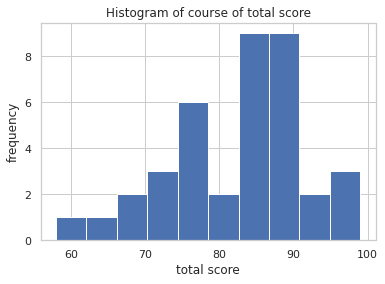

In [ ]:
plt.hist(df['Total'])
plt.title('Histogram of course of total score')
plt.xlabel('total score')
plt.ylabel('frequency');

#### Problem 2

How does the distribution of course scores appear if we use a density plot?

Create a density plot of variable Total.

Be sure to include a sensible title and x axis label.  (For density plots a custom y axis label is not needed, because it will always be counts.)

Create your plot using Pandas.

Text(0.5, 0, 'total score')

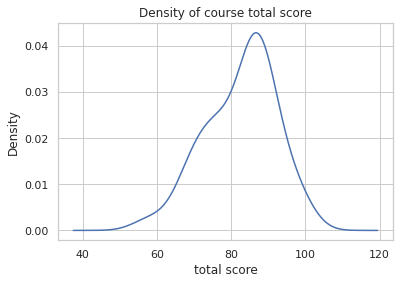

In [ ]:
# YOUR CODE HERE
df['Total'].plot.density()
plt.title('Density of course total score')
plt.xlabel('total score');

#### Problem 3

Did students tend to miss a lot of days of class?

Use a bar plot to plot the number of occurrences of each value of Num_days_missed in the dataset.

Use value_counts() to get the number of occurences.

The bars should appear in order of number of absences.  To do this, you can sort the result of value_counts().  There are two main Pandas methods for sorting a series: .sort_values() and .sort_index().

Text(0.5, 0, 'Number of absences')

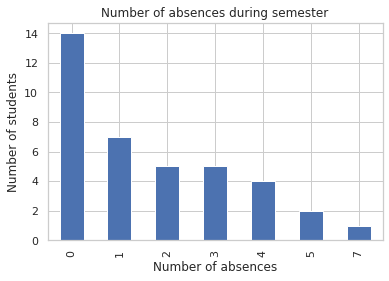

In [ ]:
# YOUR CODE HERE
a=(df['Number_days_missed'].value_counts()).sort_index()
a.plot.bar()
plt.title('Number of absences during semester')
plt.ylabel('Number of students')
plt.xlabel('Number of absences');
#df['Number_days_missed'].value_counts()

#### Problem 4

What are the probabilities for each number of absences?

Create a probability mass function (PMF) plot for variable Number_days_missed, where the probabilities are estimated from the data.  Use a bar plot.

As in the last problem, the number of absences should increase on the x axis.

You will again use value_counts(), but use the 'normalize' parameter.

Text(0.5, 0, 'Number of absences')

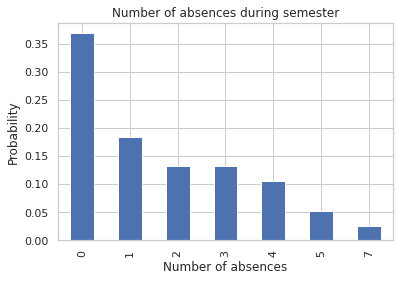

In [ ]:
# YOUR CODE HERE
a=(df['Number_days_missed'].value_counts(normalize=True)).sort_index()
a.plot.bar()
plt.title('Number of absences during semester')
plt.ylabel('Probability')
plt.xlabel('Number of absences');

#### Problem 5

What is the probability of 4 absences or less?  It will be easy to see if we plot the cumulative distribution function (CDF).

Repeat the previous problem, but this time plot the CDF.

Don't forget function cumsum().

Text(0.5, 0, 'Number of absences')

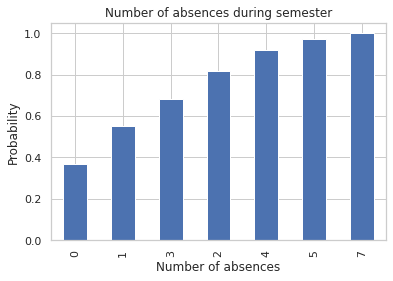

In [ ]:
# YOUR CODE HERE
a=(df['Number_days_missed']).value_counts(normalize=True).cumsum()
a.plot.bar()
plt.title('Number of absences during semester')
plt.ylabel('Probability')
plt.xlabel('Number of absences');
#df['Number_days_missed'].value_counts()

#### Problem 6

What is the probability of not doing a homework assignment?

Create a PMF plot for variable Number_missing_hw.

The number of missing HW assignments should increase on the x axis.

Text(0.5, 0, 'Number of HW assignments ')

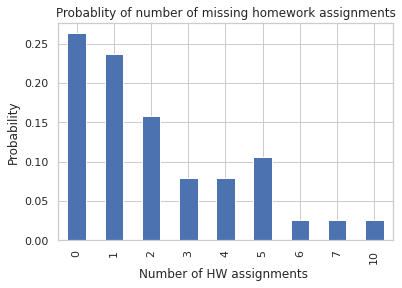

In [ ]:
# YOUR CODE HERE
a=(df['Number_hw_missed']).value_counts(normalize=True).sort_index()
a.plot.bar()
plt.title('Probablity of number of missing homework assignments')
plt.ylabel('Probability')
plt.xlabel('Number of HW assignments ');

### Basic statistics

#### Problem 7

What is the average class score?

Print the average of variable Total.

Print using 1 digit to the right of the decimal point.

In [ ]:
# YOUR CODE HERE
x = df['Total'].mean()
print(f'Average class score: {x:.1f}')

Average class score: 82.6


#### Problem 8

What is the median class score?  Is it very different from the mean?

Repeat the previous problem, but with the median.

In [ ]:
# YOUR CODE HERE
x = df['Total'].median()
print(f'Average class score: {x:.1f}')

Average class score: 85.0


#### Problem 10

What is the standard deviation of the class score?

Repeat the previous problem, but with standard deviation.  Print two digits to the right of the decimal point in this problem.

In [ ]:
# YOUR CODE HERE
x=df['Total'].std()
print(f'Standard deviation of class score: {x:.2f}')

Standard deviation of class score: 9.35


#### Problem 11

Are the course total scores more spread out than the course project scores?

Repeat the previous problem, but with total project score instead of total course score.  Print two digits to the right of the decimal point in this problem.

In [ ]:
# YOUR CODE HERE
x=df['Projects'].std()
print(f'Standard deviation of project score: {x:.2f}')

Standard deviation of project score: 11.61


#### Problem 13

How do the standard deviations for all course projects and assignments compare?

We can see this with the output of .describe(), but I want you to compute it using simple aggregation.

Print the standard deviation for all columns of df except for Number_hw_missed and Number_days_missed.  List the components in the same order as they appear in dataframe df.

Print two digits to the right of the decimal point.  You can do this using .round(), but don't modify the df dataframe.

In [ ]:
# YOUR CODE HERE
print(df[['Homework','Quizzes','Projects','Final','Total']].std().round(2))
#x=df[['Homework','Quizzes','Projects','Final','Total']].std()
#print(f'Standard deviation of all grade components: {x:.2f}')

Homework    16.86
Quizzes     12.64
Projects    11.61
Final       11.06
Total        9.35
dtype: float64


### Estimated probabilities

#### Problem 14

What's the probability of passing?  In other words, of having a course total >= 70.

Estimate P(Total >= 70) from the data and print it.  It's a marginal probability.  Remember, all probability values are between 0 and 1.  Use three significant digits.

In [ ]:
# YOUR CODE HERE
x=(df['Total'] >= 70).mean()
print(f'P(Total >= 70): {x:.3f}')

P(Total >= 70): 0.921


#### Problem 15

What's the probability of getting an A?  In other words, of having a course total of at least 90.

Repeat the previous problem but using 90 instead of 70.

In [ ]:
# YOUR CODE HERE
x=(df['Total'] >= 90).mean()
print(f'P(Total >= 90): {x:.3f}')

P(Total >= 90): 0.211


#### Problem 16

What's the probability of being absent more than twice?  

Print the estimated value of P(Number_days_missed > 2).  As usual, use three significant digits when you print.

In [ ]:
# YOUR CODE HERE
x=(df['Number_days_missed'] > 2).mean()
print(f'P(Number_days_missed > 2): {x:.3f}')

P(Number_days_missed > 2): 0.316


#### Problem 17

How do absences and missing homework assignments related to course score?  This is the main question we're interested in.

What's the probability of passing the course and missing more than two days and passing the course?  

This is the joint probability P(Total >= 70, Number_days_missed > 2).  Print your answer.

In [ ]:
# YOUR CODE HERE
x=((df['Total'] >= 70) &(df['Number_days_missed'] > 2)).mean()
print(f'P(Total >= 70, Number_days_missed > 2): {x:.3f}')

P(Total >= 70, Number_days_missed > 2): 0.263


#### Problem 18

A similar question is: what's the probability of passing the course **given** absences on more than two days.

This is the conditional probability P(Total >= 70 | Number_days_missed > 2).  Print your answer.

In [ ]:
# YOUR CODE HERE
df_x = df[df['Number_days_missed'] > 2]
x=(df_x['Total'] >= 70).mean().round(3)
print(f'P(Total >= 70 | Number_days_missed > 2): {x:.3f}')

P(Total >= 70 | Number_days_missed > 2): 0.833


#### Problem 19

The probability of passing with more than two absences is pretty high, but lower than the marginal probability of passing the class.

What's the probability of passing the class with no absences?

Print P(Total >= 70 | Number_days_missed = 0).

In [ ]:
# YOUR CODE HERE
df_x = df[df['Number_days_missed'] == 0]
x=(df_x['Total'] >= 70).mean()
print(f'P(Total >= 70 | Number_days_missed = 0): {x:.3f}')

P(Total >= 70 | Number_days_missed = 0): 1.000


#### Problem 20

In this section, everyone who never missed class passed.

What's the probability of getting an A with more than 2 absences?

Print P(Total >= 90 | Number_days_missed > 2).

In [ ]:
# YOUR CODE HERE
df_x = df[df['Number_days_missed'] > 2]
x=(df_x['Total'] >= 90).mean()
print(f'P(Total >= 90 | Number_days_missed > 2): {x:.3f}')

P(Total >= 90 | Number_days_missed > 2): 0.000


#### Problem 21

We learned that no one with than two absences passed the class.

Let's look now at missed homework assignments.  What's the probability of passing with 2 or more missing homework assignments?

Print P(Total >= 70 | Number_hw_missed > 2).

In [ ]:
# YOUR CODE HERE
df_x = df[df['Number_hw_missed'] > 2]
x=(df_x['Total'] >= 70).mean()
print(f'P(Total >= 70 | Number_hw_missed > 2): {x:.3f}')

P(Total >= 70 | Number_hw_missed > 2): 0.769


#### Problem 22

We've looked at the probability of passing more than 2 missing homework assignments.

What about the probability of missing 2 or more homework assignments given that a student passes the class?  Do you expect this probability value to be the same?

Print P(Number_hw_missed > 2 | Total >= 70).

In [ ]:
# YOUR CODE HERE
df_x = df[df['Total'] >= 70]
x=(df_x['Number_hw_missed'] > 2).mean()
print(f'P(Number_hw_missed > 2 | Total >= 70): {x:.3f}')

P(Number_hw_missed > 2 | Total >= 70): 0.286


Do you have a good feel for the difference between P(Total >= 70 | Number_hw_missed > 2) and P(Number_hw_missed > 2 | Total >= 70)?

#### Problem 23

Is seems that not doing a homework assignment is more of a problem than being absent once.  That's what I would expect.

What's the probability of getting an A with 2 or more missing homework assignments?

Print P(Total >= 90 | Number_hw_missed > 2).

In [ ]:
# YOUR CODE HERE
df_x = df[df['Number_days_missed'] > 2]
x=(df_x['Total'] >= 90).mean()
print(f' P(Total >= 90 | Number_hw_missed > 2): {x:.3f}')

 P(Total >= 90 | Number_hw_missed > 2): 0.000


The homework score is a big component of the final course score, so this is not surprising.

#### Problem 24

Instead of computing probabilities, let's look at the distribution of grades for those with more than 2 absences, and for those with no more than 2 absences.

First, create a density plot for the variable Total, but only use the rows of the data in which there are more than two absences.

Use 40-110 as the x axis limits.  

Text(0, 0.5, 'density')

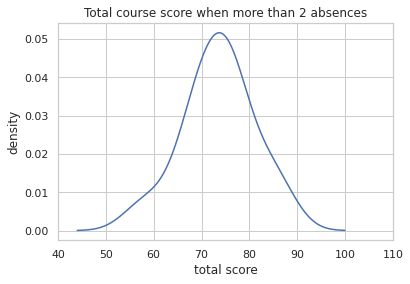

In [ ]:
# YOUR CODE HERE
#(df['Total']).plot.density()
#df_x=df[df['Number_days_missed'] > 2]
#sns.kdeplot(x='Number_days_missed', y='Total', data=df)
#x = df['Total'][(df['Number_days_missed']>2)]
df[(df['Number_hw_missed']>2)]['Total'].plot.density()
plt.title('Total course score when more than 2 absences')
plt.xlabel('total score')
plt.xlim([40, 110])
plt.ylabel('density');

#### Problem 23

Now create a density plot for the variable Total, but only use the rows of the data in which there are no more than two absences.

Again, use 40-110 as the x axis limits. Using the same x axis range on the two plots will make them easier to compare.

Text(0, 0.5, 'density')

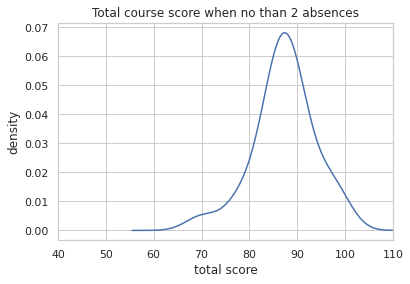

In [ ]:
# YOUR CODE HERE
df[(df['Number_hw_missed']<=2)]['Total'].plot.density()
plt.title('Total course score when no than 2 absences')
plt.xlabel('total score')
plt.xlim([40, 110])
plt.ylabel('density');

#### Problem 24

To make comparison of the distributions easier, they can be plotted in the same plot.

Create a new plot showing the two densities of the last two plots.  Refer to the graphics lecture for information on creating a legend.  The Pandas density() method accepts a 'label' parameter.

(40.0, 110.0)

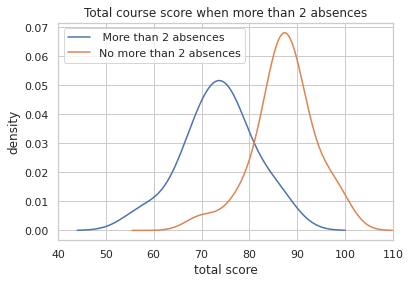

In [ ]:
# YOUR CODE HERE
df[(df['Number_hw_missed']>2)]['Total'].plot.density(label=' More than 2 absences')
df[(df['Number_hw_missed']<=2)]['Total'].plot.density(label='No more than 2 absences')
plt.title('Total course score when more than 2 absences')
plt.xlabel('total score')
plt.ylabel('density')
plt.legend()
plt.xlim(40,110);

Having more than two absences has a big impact on the course grade.  However, note that part of the course grade is a participation component, which is affected by absences.  

#### Problem 25

What about the combination of missing class and missing homework assignments?  Is missing class *and* missing homework assignments particularly bad?

Print P(Total >= 70 | (Num_hw_missed > 2 and Number_days_missed > 2))

In [ ]:
# YOUR CODE HERE
df_x = df[(df['Number_days_missed'] > 2) & (df['Number_hw_missed']>2)]
x=(df_x['Total'] >= 70).mean()
print(f' P(Total >= 90 | Projects >= 90): {x:.3f}')

 P(Total >= 90 | Projects >= 90): 0.714


#### Problem 26

Did people who got A's on their projects get an A in the class?

What's the probability of getting an A in the class given an average project score of A?

Print P(Total >= 90 | Projects >= 90)

In [ ]:
# YOUR CODE HERE
df_x = df[df['Projects'] >= 90]
x=(df_x['Total'] >= 90).mean()
print(f' P(Total >= 90 | Projects >= 90): {x:.3f}')

 P(Total >= 90 | Projects >= 90): 0.556


Remember that this number is high partly because the project grade is a big part of the total grade.